# Practicum Data Augmentation

## Imports

In [1]:
# Voeg imports toe als je ze nodig hebt

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import torch
import random

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Vision: https://pytorch.org/vision/stable/index.html

## Context

De hoeveelheid data is vaak de beperkende factor in machine learning met convolution neural nets (CNN). In dit practicum vergroten we de EuroSAT dataset kunstmatig, zodat ons CNN meer variatie ziet om van te leren.

## Opdrachten

### Opdracht 1: dataset downloaden

Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.

In [ ]:
# Extra: kun je de dataset ook met python downloaden?

# Hint: gebruik de requests module

### Opdracht 2: dataset inspecteren

Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

In [ ]:
# Extra: kun je de dataset ook met python unzippen?

# Hint: gebruik de zipfile module

### Opdracht 3: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [24]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

# b. Wat is het relative pad van 'Industrial_1.jpg'?

# c. Bekijk de documentatie van de PyTorch io module

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')

industrialDirectory = '../pics/2750/Industrial'

industrial = torchvision.io.read_image(f'{industrialDirectory}/Industrial_1.jpg', ImageReadMode.UNCHANGED).float() / 255


### Opdracht 4: afbeelding tonen

PyTorch Vision maakt ook het tonen van afbeeldingen gemakkelijk.

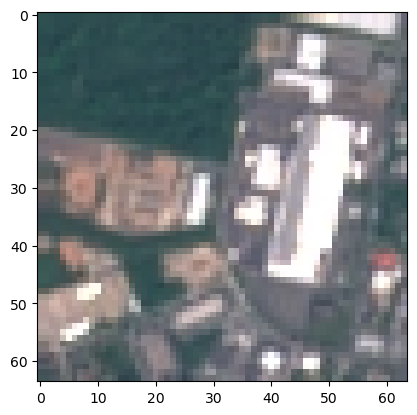

In [25]:
# a. Bekijk het overzicht op https://pytorch.org/vision/stable/index.html

# b. Kun je iets vinden waarmee je een afbeelding kunt tonen?

# c. Toon de afbeelding 'Industrial_1.jpg'
plt.imshow( industrial.permute(1, 2, 0)  );

### Opdracht 5: afbeelding bewerken

Ook augmentatie maakt PyTorch Vision makkelijk.

torch.Size([3, 64, 64])
torch.Size([3, 128, 128])


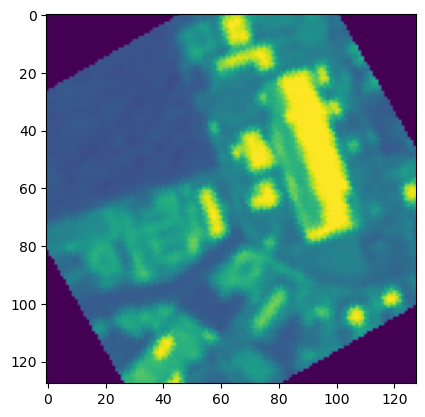

In [32]:
# a. Welke module is bedoeld voor het bewerken van afbeeldingen?
# torchvision.transforms

# b. Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')
twoTimes = T.Resize(128)
industrial_2x = twoTimes(industrial)

print(industrial.shape)
print(industrial_2x.shape)

# c. Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot')
angle = 30
# x = torch.randn(1,3,512,512)

industrial_2x_rot = TF.rotate(industrial_2x, angle)
plt.imshow( industrial_2x_rot.permute(1, 2, 0)  );

# d. Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')
industrial_2x_rot_gray = TF.rgb_to_grayscale(industrial_2x_rot)
plt.imshow( industrial_2x_rot_gray.permute(1, 2, 0)  );


# e. Sla de bewerkte afbeeldingen op

# f. Toon alle varianten in een grid

In [33]:
def showImages():
    
    plt.figure(figsize=(10,10))
    
    for i in range(4):
        
        # Maak een 2 x 2 raster van Images
        plt.subplot(2, 2, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)        
                
        # Van Tensor terug naar Image
        plt.imshow(imageTensors[i])
        
        # Bijbehorende Imagelabel
        plt.xlabel( f"{labelNames[labelNumbers[i]]} {labelNumbers[i]}" ) 

    plt.show()          

NameError: name 'imageTensors' is not defined

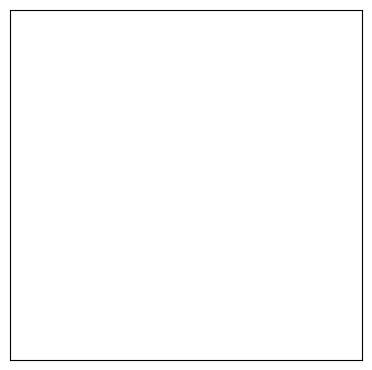

In [34]:
showImages() 

### Reflectie

Zijn alle transformaties zinnig voor deze dataset?

In [11]:
# Extra: Je kunt alle acties ook bundelen, 
# zie: https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

# a. Probeer nog een aantal transformaties uit en bundel ze als 1 tranformatie

### Opdracht 6: batch bewerkingen

Tot nu toe hebben we een enkele afbeelding bewerkt.

In [ ]:
# Generaliseer de bovenstaande stappen en batch-bewerk de Industrial folder

# ...